Build a regression model using Scikit-learn: prepare and visualize data

we are going to learn how to prepare data for model building

how to use matplotlib for data visualization

Asking the right question of your data

The question you need answered will determine what type of ML algorithms you will leverage. And the quality of the answer you get back will be heavily dependent on the nature of your data.

Case study: 'the pumpkin market'

In this folder you will find a .csv file in the root data folder called US-pumpkins.csv which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

Preparing data

This data is in the public domain. It can be downloaded in many separate files, per city, from the USDA web site. To avoid too many separate files, we have concatenated all the city data into one spreadsheet, thus we have already prepared the data a bit. Next, let's take a closer look at the data.

The pumpkin data - early conclusions

What do you notice about this data? You already saw that there is a mix of strings, numbers, blanks and strange values that you need to make sense of.

What question can you ask of this data, using a Regression technique? What about "Predict the price of a pumpkin for sale during a given month". Looking again at the data, there are some changes you need to make to create the data structure necessary for the task.

Exercise - analyze the pumpkin data

Let's use Pandas, (the name stands for Python Data Analysis) a tool very useful for shaping data, to analyze and prepare this pumpkin data.

First, check for missing dates

You will first need to take steps to check for missing dates:

    

1 Convert the dates to a month format (these are US dates, so the format is MM/DD/YYYY).

2 Extract the month to a new column.

Use the head() function to view the first five rows.

In [9]:
import pandas as pd
pumpkins = pd.read_csv('../Week 04 _ Regression/Data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

What function would you use to view the last five rows?

In [10]:
pumpkins.tail()

City Name Type        Package    Variety Sub Variety  Grade     Date  \
1752  ST. LOUIS  NaN  22 lb cartons  MINIATURE   FLAT TYPE    NaN  9/30/16   
1753  ST. LOUIS  NaN   36 inch bins  MINIATURE  ROUND TYPE    NaN  9/26/16   
1754  ST. LOUIS  NaN   36 inch bins  MINIATURE  ROUND TYPE    NaN  9/27/16   
1755  ST. LOUIS  NaN   36 inch bins  MINIATURE  ROUND TYPE    NaN  9/28/16   
1756  ST. LOUIS  NaN   36 inch bins  MINIATURE  ROUND TYPE    NaN  9/29/16   

      Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
1752      14.75       14.75         NaN  ...           NaN     NaN       NaN   
1753     275.00      275.00         NaN  ...           NaN     NaN       NaN   
1754     275.00      275.00         NaN  ...           NaN     NaN       NaN   
1755     275.00      275.00         NaN  ...           NaN     NaN       NaN   
1756     275.00      275.00         NaN  ...           NaN     NaN       NaN   

     Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  \
1752        NaN     NaN   NaN      N         NaN          NaN   
1753        NaN     NaN   NaN      N         NaN          NaN   
1754        NaN     NaN   NaN      N         NaN          NaN   
1755        NaN     NaN   NaN      N         NaN          NaN   
1756        NaN     NaN   NaN      N         NaN          NaN   

                          Unnamed: 25  
1752                           LOWER.  
1753                           LOWER.  
1754                          STEADY.  
1755                    ABOUT STEADY.  
1756  MINIATURE LOWER, OTHERS STEADY.  

[5 rows x 26 columns]

Check if there is missing data in the current dataframe:

In [6]:
pumpkins.column

NameError: name 'pumpkins' is not defined

In [11]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
pumpkins.column

NameError: name 'pumpkins' is not defined

There is missing data, but maybe it won't matter for the task at hand.

To make your dataframe easier to work with, drop several of its columns, using drop(), keeping only the columns you need:

In [12]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

Determining the average Price of Pumpkin

Think about how to determine the average price of a pumpkin in a given month. What columns would you pick for this task? Hint: you'll need 3 columns.

1 To calculate the average, add the following code:

In [14]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)


2 Now, copy your converted data into a fresh Pandas dataframe:

In [19]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})




But wait! There's something odd here

If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

1 Add a filter at the top of the file, under the initial .csv import:

In [17]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print (pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


But wait! There's one more thing to do

Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

1 Add these lines after the block creating the new_pumpkins dataframe:

In [ ]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Visualization Strategies

art of the data scientist's role is to demonstrate the quality and nature of the data they are working with. To do this, they often create interesting visualizations, or plots, graphs, and charts, showing different aspects of data. In this way, they are able to visually show relationships and gaps that are otherwise hard to uncover.

Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.

Exercise - experiment with Matplotlib

Try to create some basic plots to display the new dataframe you just created. What would a basic line plot show?

1 import Matplotlib at the top of the file, under the Pandas import:

In [22]:
import matplotlib.pyplot as plt

2 Rerun the entire notebook to refresh.

3 At the bottom of the notebook, add a cell to plot the data as a box:

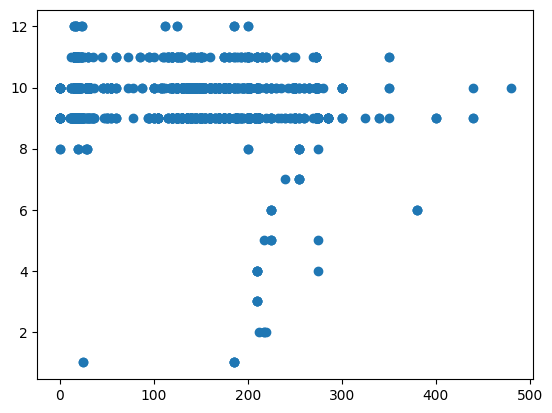

In [23]:
import matplotlib.pyplot as plt
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Make it useful

To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the months and the data demonstrates the distribution of data.

1 Add a cell to create a grouped bar chart:

Text(0, 0.5, 'Pumpkin Price')

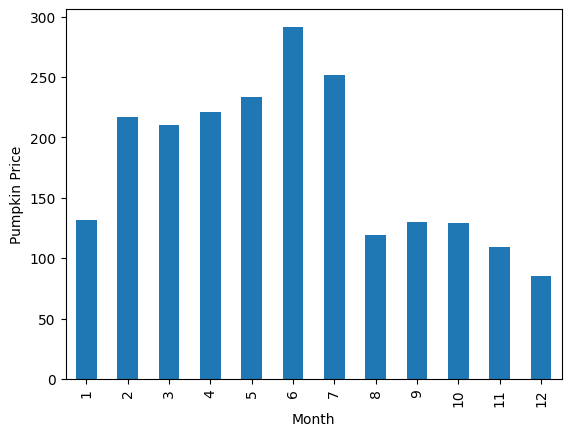

In [24]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

This is a more useful data visualization! It seems to indicate that the highest price for pumpkins occurs in September and October. Does that meet your expectation? Why or why not?

Challenge

For regression problems, some of the plot types that are most appropriate are:

Scatter plot with line of best fit, to show the relationship between two variables and the fitted regression line.

Residual plot, to show the distribution of the errors or deviations from the regression line.

Q-Q plot, to check if the residuals are normally distributed.

Partial regression plot, to show the effect of a single predictor variable on the response variable after removing the effect of other predictors.